In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sys

sys.path.append('../src/')

from initial_data_clean import us_county_df
from grouping_functions import *
from stat_functions import *

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
years
year_bins = len(years)
year_bins

18

(array([17704.,     0., 32712.,     0., 34736.,     0., 20016.,     0.,
        10400.,  1272.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

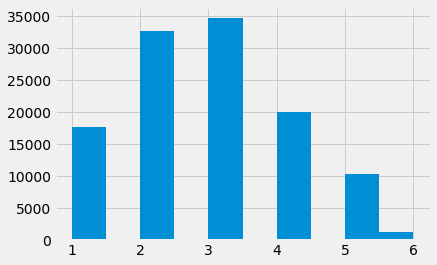

In [4]:
plt.hist(us_county_df['urbanization_code'])

(array([14976., 13048., 10896.,  6520., 10968.,  5288., 14744., 15656.,
        14584., 10160.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <a list of 10 Patch objects>)

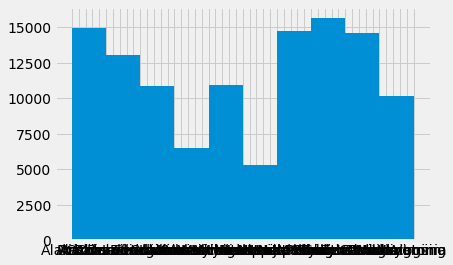

In [5]:
plt.hist(us_county_df['state'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa34b29eed0>]],
      dtype=object)

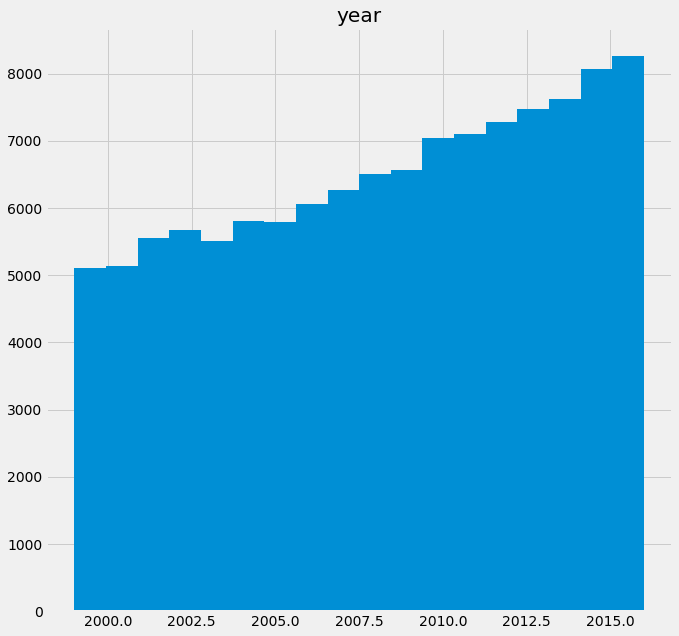

In [6]:
us_county_df.hist('year', figsize=(10,10), bins = len(years))

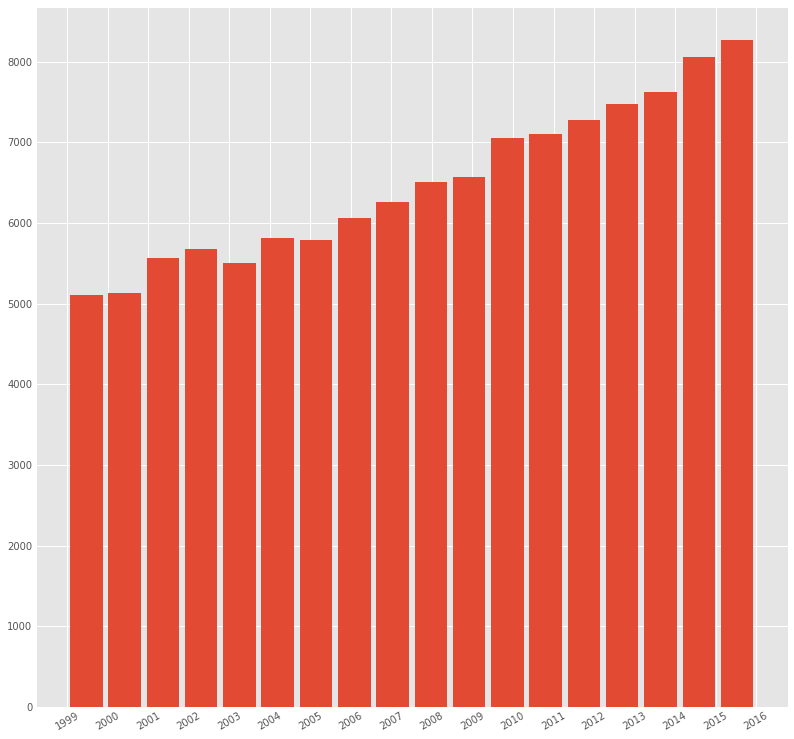

In [35]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12,12))
data = us_county_df['year']
#binz = np.arange((year_bins +1) - 0.5)
ax = plt.hist(data, bins = 18, align='mid', rwidth=0.85)
plt.xticks(years, rotation=30)
plt.show()

In [8]:
metro, non_metro = GroupBy(us_county_df).metro_non_metro()

In [9]:
metro_mean, metro_std = get_norm_coef(metro)
non_metro_mean, non_metro_std = get_norm_coef(non_metro)

In [10]:
def normal_dist(mean, std):
    # This returns Normal dist with desired coefs
    return stats.norm(loc=mean, scale=std)

In [11]:
metro_norm = normal_dist(metro_mean, metro_std)
non_metro_norm = normal_dist(non_metro_mean, non_metro_std)
t_test = stats.ttest_ind(metro['age_adjusted_rate'], non_metro['age_adjusted_rate'], equal_var=False)

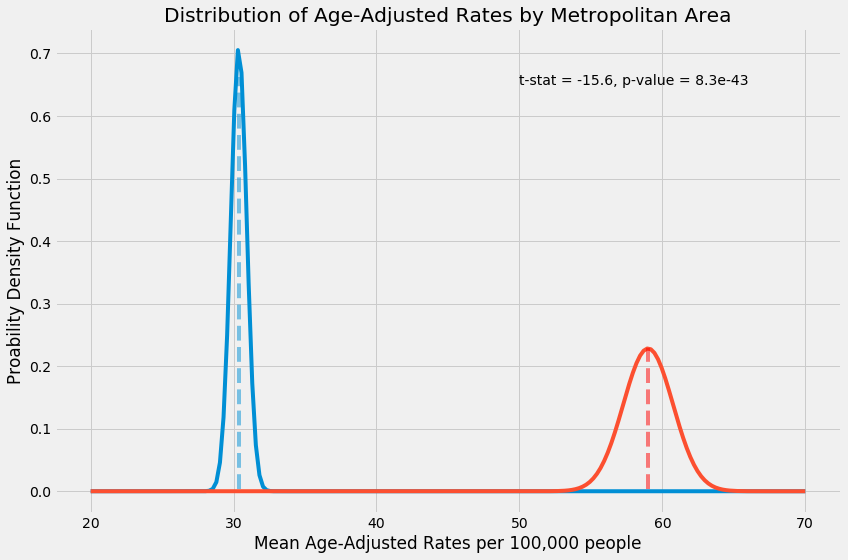

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
x = np.linspace(20, 70, 200)
ax.plot(x, metro_norm.pdf(x), label='Metro')
ax.plot(x, non_metro_norm.pdf(x), label='Non-Metro')
ax.set_title('Distribution of Age-Adjusted Rates by Metropolitan Area')
ax.set_xlabel('Mean Age-Adjusted Rates per 100,000 people')
ax.set_ylabel('Proability Density Function')
ax.axvline(metro_mean, ymin=0.05, ymax=0.9, ls='--', alpha = 0.5)
ax.axvline(non_metro_mean, ymin=0.05, ymax=0.34, ls='--', alpha = 0.5, color='red')
plt.text(x=50,y=0.65,
        s=f't-stat = {t_test[0]:.1f}, p-value = 8.3e-43')
plt.tight_layout()

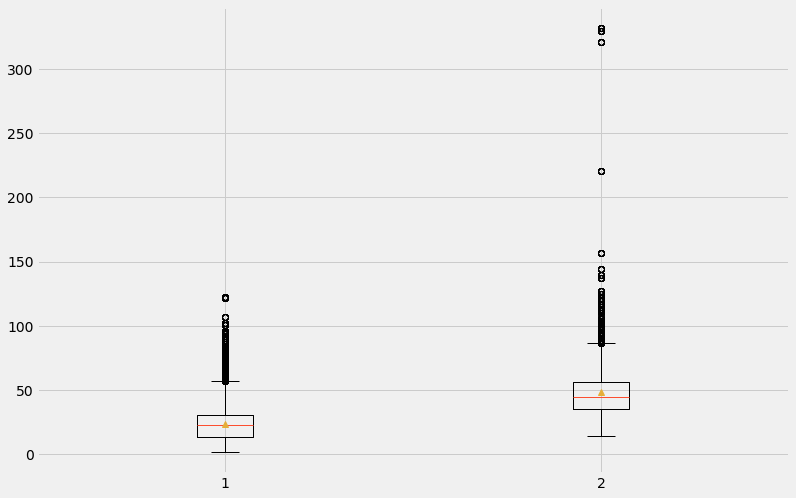

In [13]:
fig, ax = plt.subplots(figsize=(12,8))
ax.boxplot(metro_box_plot_df(us_county_df), showmeans=True)
plt.show()